<a href="https://colab.research.google.com/github/suzannenazareth/carbon_analysis/blob/main/C02_Emission_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns






In [6]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [7]:
df.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [9]:
df.isnull().sum()
df = df.dropna()  # or df.fillna(method='ffill', inplace=True)




In [10]:
df.describe()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [11]:
# Group by Vehicle Class and calculate total CO2 emissions
emissions_by_vehicle_class = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].sum()

# Sort the result for better readability
emissions_by_vehicle_class = emissions_by_vehicle_class.sort_values(ascending=False)

# Display the result
print(emissions_by_vehicle_class)



Vehicle Class
SUV - SMALL                 287568
MID-SIZE                    252042
SUV - STANDARD              224055
COMPACT                     221446
FULL-SIZE                   168259
PICKUP TRUCK - STANDARD     162214
SUBCOMPACT                  149348
TWO-SEATER                  127629
MINICOMPACT                  77134
STATION WAGON - SMALL        50417
PICKUP TRUCK - SMALL         44356
VAN - PASSENGER              26216
MINIVAN                      20985
SPECIAL PURPOSE VEHICLE      18295
STATION WAGON - MID-SIZE     12651
VAN - CARGO                   7953
Name: CO2 Emissions(g/km), dtype: int64


In [12]:
# Group by Fuel Type and calculate total CO2 emissions
emissions_by_fuel_type = df.groupby('Fuel Type')['CO2 Emissions(g/km)'].sum()

# Sort the result for better readability
emissions_by_fuel_type = emissions_by_fuel_type.sort_values(ascending=False)

# Display the result
print(emissions_by_fuel_type)


Fuel Type
X    855129
Z    851871
E    101784
D     41571
N       213
Name: CO2 Emissions(g/km), dtype: int64


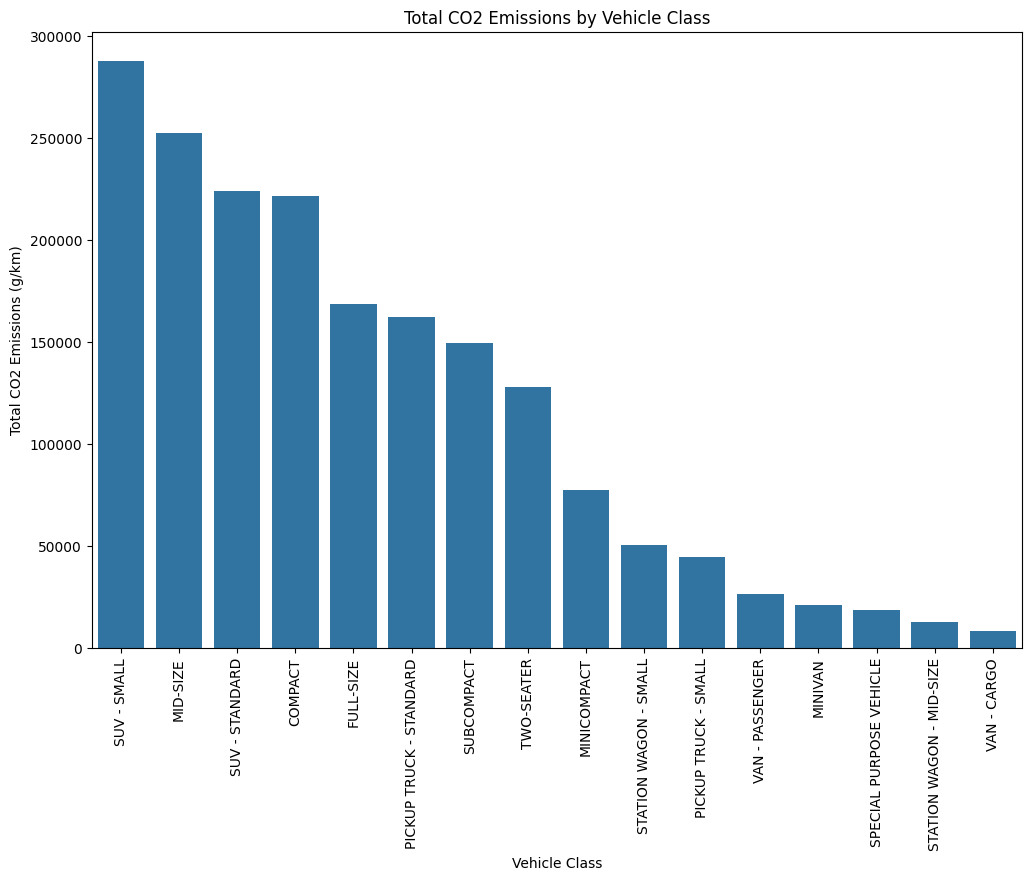

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x=emissions_by_vehicle_class.index, y=emissions_by_vehicle_class.values)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Class')
plt.ylabel('Total CO2 Emissions (g/km)')
plt.title('Total CO2 Emissions by Vehicle Class')
plt.show()



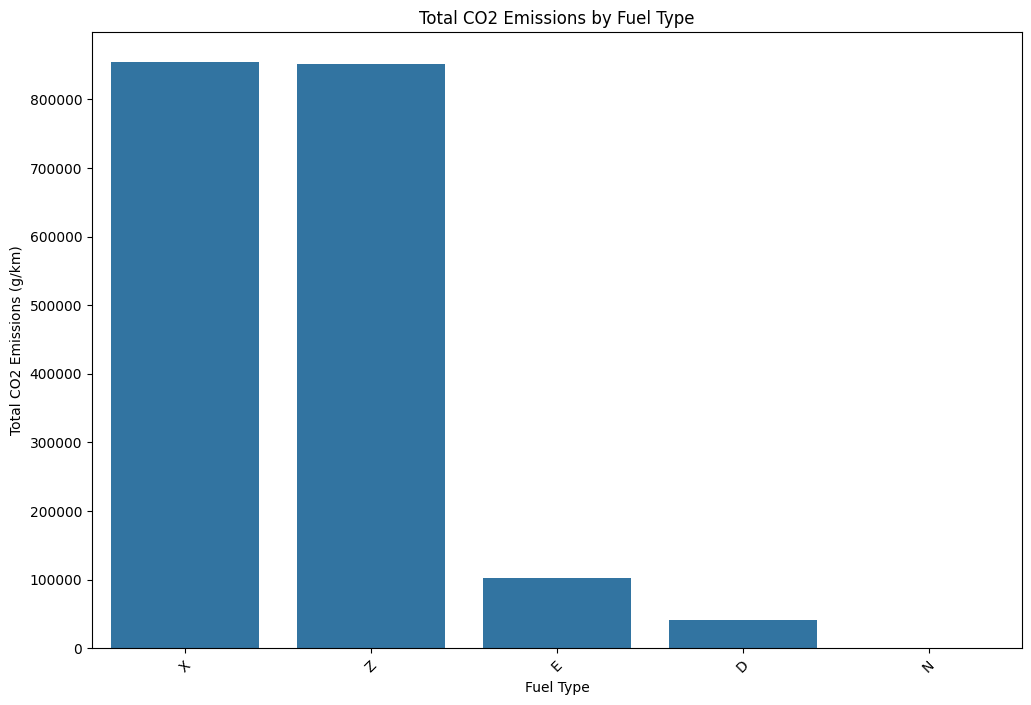

In [14]:
plt.figure(figsize=(12, 8))
sns.barplot(x=emissions_by_fuel_type.index, y=emissions_by_fuel_type.values)
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Total CO2 Emissions (g/km)')
plt.title('Total CO2 Emissions by Fuel Type')
plt.show()


PREDICTIVE ANALYSIS


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('CO2 Emissions_Canada.csv')

# Select features and target
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
        'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
        'Fuel Consumption Comb (mpg)']]
y = df['CO2 Emissions(g/km)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

print("Linear Regression Performance:")
print(evaluate_model(y_test, y_pred_lr))

print("Random Forest Regressor Performance:")
print(evaluate_model(y_test, y_pred_rf))


Linear Regression Performance:
(11.530719771854942, 337.46089969743224, 18.37010886460481, 0.9018902750130587)
Random Forest Regressor Performance:
(3.220991779810011, 84.2738092703876, 9.180076757325486, 0.9754991459498483)


Number of anomalies detected: 74


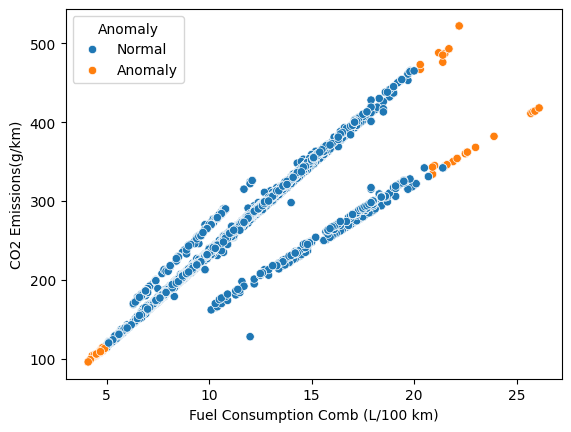

In [17]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('CO2 Emissions_Canada.csv')

# Select features
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
        'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
        'Fuel Consumption Comb (mpg)']]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the model
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
iso_forest.fit(X_scaled)

# Predict anomalies (1 for normal, -1 for anomalies)
anomalies = iso_forest.predict(X_scaled)

# Add anomaly scores to the dataframe
df['Anomaly'] = anomalies

# Number of anomalies
print("Number of anomalies detected:", (df['Anomaly'] == -1).sum())

# Visualize anomalies
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)',
                hue=df['Anomaly'].replace({1: 'Normal', -1: 'Anomaly'}), data=df)
plt.show()


In [18]:
import pandas as pd

# Load the cleaned dataset
data= pd.read_csv('CO2 Emissions_Canada.csv')

# Display basic information
print(data.info())

# Display summary statistics
print(data.describe())

# Fill missing values if necessary
data.fillna(method='ffill', inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

<ipython-input-18-4584970928f9>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [19]:
# Assuming average distance traveled is 15,000 km per year
average_distance = 15000

# Calculate total emissions per vehicle
data['Total Emissions (g)'] = data['CO2 Emissions(g/km)'] * average_distance

# Calculate total emissions
total_emissions = data['Total Emissions (g)'].sum() / 1e6  # Convert to tons
print(f'Total CO2 Emissions: {total_emissions:.2f} tons')

# Calculate average emissions by vehicle class and fuel type
average_emissions_by_class = data.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean()
average_emissions_by_fuel = data.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean()

print(average_emissions_by_class)
print(average_emissions_by_fuel)


Total CO2 Emissions: 27758.52 tons
Vehicle Class
COMPACT                     216.679061
FULL-SIZE                   263.316119
MID-SIZE                    222.455428
MINICOMPACT                 236.607362
MINIVAN                     262.312500
PICKUP TRUCK - SMALL        278.968553
PICKUP TRUCK - STANDARD     301.513011
SPECIAL PURPOSE VEHICLE     237.597403
STATION WAGON - MID-SIZE    238.698113
STATION WAGON - SMALL       200.067460
SUBCOMPACT                  246.448845
SUV - SMALL                 236.292523
SUV - STANDARD              304.836735
TWO-SEATER                  277.454348
VAN - CARGO                 361.500000
VAN - PASSENGER             397.212121
Name: CO2 Emissions(g/km), dtype: float64
Fuel Type
D    237.548571
E    275.091892
N    213.000000
X    235.119329
Z    266.043410
Name: CO2 Emissions(g/km), dtype: float64


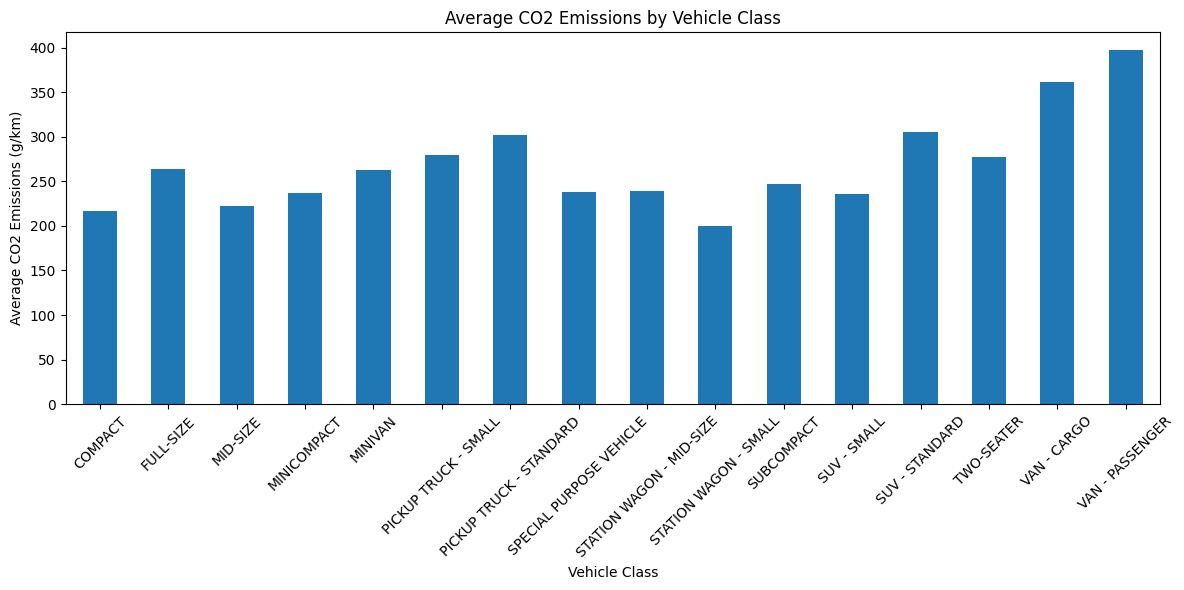

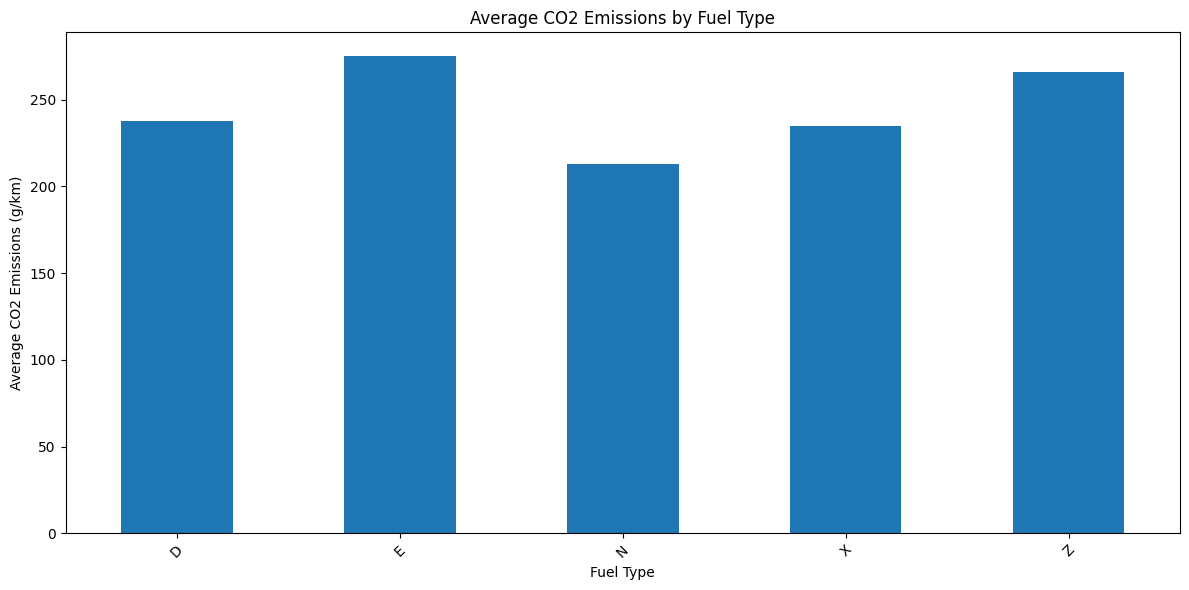

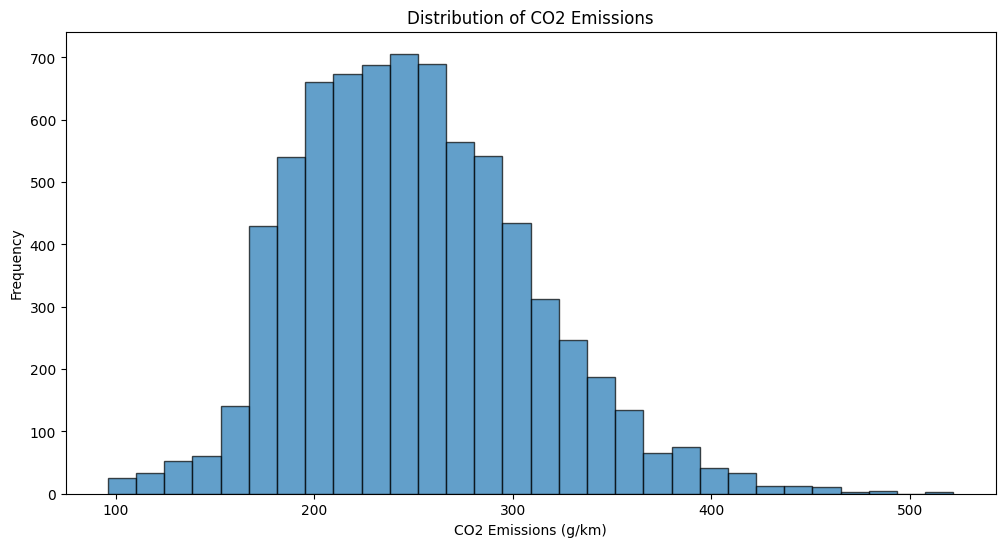

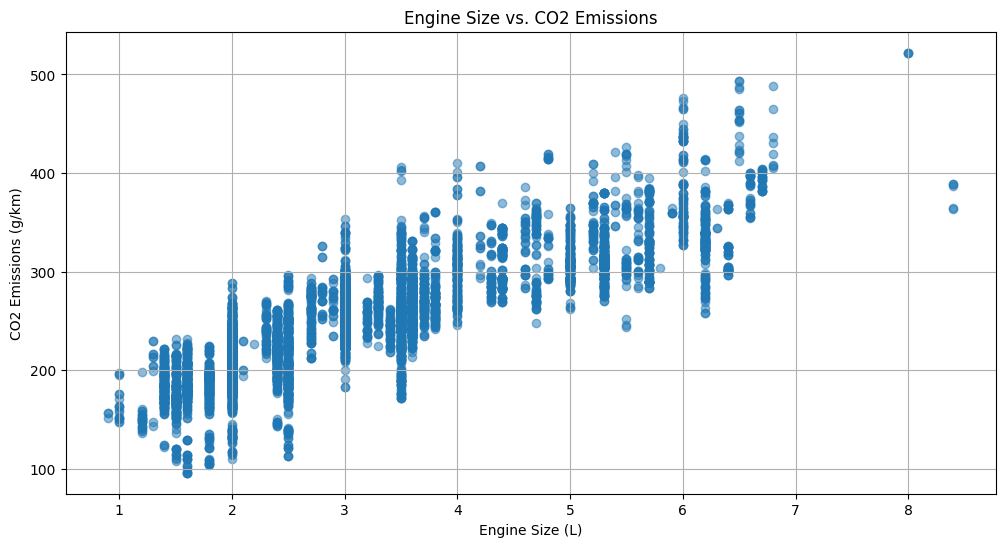

In [20]:
import matplotlib.pyplot as plt

# Bar Chart: Average emissions by vehicle class
plt.figure(figsize=(12, 6))
average_emissions_by_class.plot(kind='bar')
plt.title('Average CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Chart: Average emissions by fuel type
plt.figure(figsize=(12, 6))
average_emissions_by_fuel.plot(kind='bar')
plt.title('Average CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram: Distribution of CO2 emissions
plt.figure(figsize=(12, 6))
plt.hist(data['CO2 Emissions(g/km)'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot: Engine size vs. CO2 emissions
plt.figure(figsize=(12, 6))
plt.scatter(data['Engine Size(L)'], data['CO2 Emissions(g/km)'], alpha=0.5)
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()
